<a href="https://colab.research.google.com/github/farhananwari07/TugbesML_145-157/blob/main/CNN%2BResnetML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/dataset"

In [ ]:
%cd /content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [ ]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

 96% 152M/158M [00:01<00:00, 109MB/s]
100% 158M/158M [00:01<00:00, 115MB/s]


In [ ]:
# Ekstrak dataset

import os
import zipfile

local_zip = '/content/drive/MyDrive/dataset/covid19-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/dataset/covid19')
zip_ref.close()

In [ ]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/dataset/covid19/Covid19-dataset/train",
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          shuffle = False,
                                          class_mode = 'categorical',
                                          )
                                     
test_dataset = test.flow_from_directory("/content/drive/MyDrive/dataset/covid19/Covid19-dataset/test",
                                          target_size= (224, 224),
                                          batch_size = 32,
                                          shuffle = False,
                                          class_mode = 'categorical')

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
train_dataset.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),

   

  
])

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, decay = 0.001/10),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_fit = model.fit(train_dataset,
            epochs = 15,
            batch_size = 32,
            validation_data = test_dataset)

Epoch 1/15
8/8 [==============================] - 16s 2s/step - loss: 1.2475 - acc: 0.2191 - val_loss: 1.0994 - val_acc: 0.3030
Epoch 2/15
8/8 [==============================] - 14s 2s/step - loss: 1.1034 - acc: 0.3825 - val_loss: 1.0964 - val_acc: 0.3939
Epoch 3/15
8/8 [==============================] - 14s 2s/step - loss: 1.0957 - acc: 0.4422 - val_loss: 1.0916 - val_acc: 0.3939
Epoch 4/15
8/8 [==============================] - 14s 2s/step - loss: 1.1038 - acc: 0.4382 - val_loss: 1.0778 - val_acc: 0.3333
Epoch 5/15
8/8 [==============================] - 15s 2s/step - loss: 1.0564 - acc: 0.4502 - val_loss: 1.0491 - val_acc: 0.5000
Epoch 6/15
8/8 [==============================] - 14s 2s/step - loss: 0.9747 - acc: 0.6215 - val_loss: 1.0153 - val_acc: 0.5303
Epoch 7/15
8/8 [==============================] - 13s 2s/step - loss: 0.7755 - acc: 0.6733 - val_loss: 0.9717 - val_acc: 0.6364
Epoch 8/15
8/8 [==============================] - 14s 2s/step - loss: 0.6444 - acc: 0.7490 - val_loss: 0

In [ ]:
%cd /content/drive/MyDrive/dataset/covid19/saved model
!ls

/content/drive/MyDrive/dataset/covid19/saved model
 AccuracyPlotWMF.png   model2.h5     model4CNNbiasa.h5
'Copy of Model.h5'     model2.json   model5Resnet50.h5
 LossPlotWMF.png       model3.h5     model6Resnet50.h5


In [ ]:
model.save("model4CNNbiasa.h5")

In [ ]:
del model, model_fit, test_dataset, train_dataset

NameError: ignored

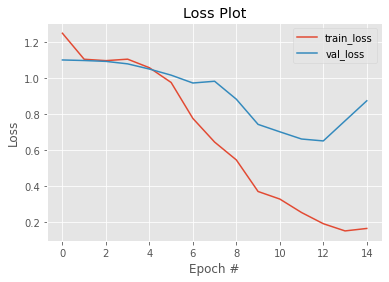

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), model_fit.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), model_fit.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

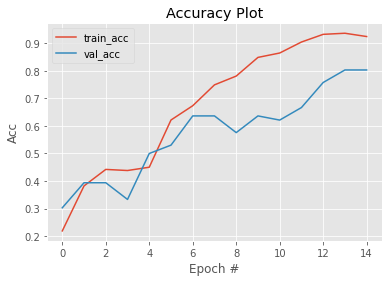

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), model_fit.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), model_fit.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model = load_model('model4CNNbiasa.h5')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
labels = ['Normal','Covid19','Pnuemonia']

In [ ]:
import seaborn as sns
def evaluate1(val_gen,model):
  batch_size = 12
  num_of_test_samples = len(val_gen.filenames)

  Y_pred = model.predict(val_gen, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  cm = confusion_matrix(val_gen.classes, y_pred)
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
  plt.xticks(ticks=[0.5, 1.5, 2.5], labels=labels)
  plt.yticks(ticks=[0.5, 1.5, 2.5], labels=labels)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()
  print('\n\nClassification Report\n')
  target_names = ['Normal','Covid19','Pnuemonia']
  print(classification_report(val_gen.classes, y_pred, target_names=target_names))

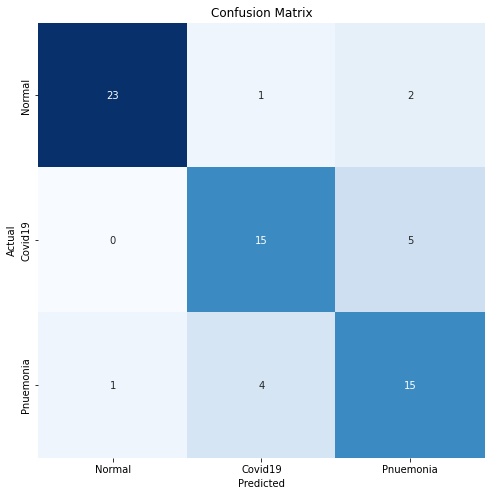



Classification Report

              precision    recall  f1-score   support

      Normal       0.96      0.88      0.92        26
     Covid19       0.75      0.75      0.75        20
   Pnuemonia       0.68      0.75      0.71        20

    accuracy                           0.80        66
   macro avg       0.80      0.79      0.79        66
weighted avg       0.81      0.80      0.81        66



In [ ]:
evaluate1(test_dataset, model)

In [ ]:
%cd /content/drive/MyDrive/dataset/covid19/saved model

/content/drive/MyDrive/dataset/covid19/saved model


In [ ]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model2.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/dataset/covid19/saved model/Copy of Model.h5')

In [ ]:
del model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping

[2]
pneumonia


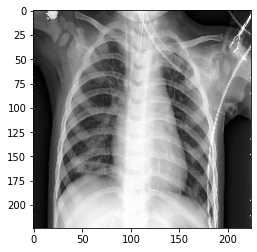

In [ ]:
from PIL import Image
from keras.preprocessing import image
label =  {0:"covid",1:"normal",2:'pneumonia'}

img_ = image.load_img("/content/drive/MyDrive/dataset/covid19/Covid19-dataset/test/Viral Pneumonia/0113.jpeg", target_size=(224, 224))
imag = image.img_to_array(img_)
imag = np.expand_dims(imag, axis=0)
pred = model.predict(imag)
pred = np.argmax(pred,axis=1)
print(pred)
print(label[pred[0]])
plt.imshow(img_)

In [ ]:
import os
import argparse
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input

In [ ]:
imagePathsTrain = list(paths.list_images("/content/drive/MyDrive/dataset/covid19/Covid19-dataset/train"))
trainX = []
trainY = []

for imagePath in imagePathsTrain:

	label = imagePath.split(os.path.sep)[-2]
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	trainX.append(image)
	trainY.append(label)

trainX = np.array(trainX, dtype="float32")
trainY = np.array(trainY)

lb = LabelEncoder()
trainY = lb.fit_transform(trainY)
trainY = to_categorical(trainY)

In [ ]:
imagePathsTest = list(paths.list_images("/content/drive/MyDrive/dataset/covid19/Covid19-dataset/test"))
testX = []
testY = []

for imagePath in imagePathsTest:

	label = imagePath.split(os.path.sep)[-2]
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	testX.append(image)
	testY.append(label)

testX = np.array(testX, dtype="float32")
testY = np.array(testY)

lb = LabelEncoder()
testY = lb.fit_transform(testY)
testY = to_categorical(testY)

In [ ]:
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2, random_state=42, stratify=trainY)

In [ ]:
print("SHAPE OF TRAIN FEATURES: "+str(trainX.shape))
print("SHAPE OF TRAIN LABELS: "+str(trainY.shape))
print("SHAPE OF VALIDATION FEATURES: "+str(valX.shape))
print("SHAPE OF VALIDATION LABELS: "+str(valY.shape))
print("SHAPE OF TEST FEATURES: "+str(testX.shape))
print("SHAPE OF TEST LABELS: "+str(testY.shape))

SHAPE OF TRAIN FEATURES: (200, 224, 224, 3)
SHAPE OF TRAIN LABELS: (200, 3)
SHAPE OF VALIDATION FEATURES: (51, 224, 224, 3)
SHAPE OF VALIDATION LABELS: (51, 3)
SHAPE OF TEST FEATURES: (66, 224, 224, 3)
SHAPE OF TEST LABELS: (66, 3)


In [ ]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
INIT_LR = 1e-4
EPOCHS = 15
BS = 32

In [ ]:
baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7,7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
	layer.trainable = True

opt = Adam(lr=INIT_LR, decay=INIT_LR/EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

94781440/94765736 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
del model, HR

In [ ]:
HR = model.fit(
	aug.flow(trainX, trainY, batch_size=BS, shuffle=False),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(valX, valY),
	validation_steps=len(valX) // BS,
	epochs= 15)

Epoch 1/15
6/6 [==============================] - 27s 2s/step - loss: 1.1247 - accuracy: 0.3929 - val_loss: 0.8452 - val_accuracy: 0.5686
Epoch 2/15
6/6 [==============================] - 5s 731ms/step - loss: 0.8012 - accuracy: 0.6354 - val_loss: 0.5829 - val_accuracy: 0.7059
Epoch 3/15
6/6 [==============================] - 4s 652ms/step - loss: 0.6135 - accuracy: 0.7679 - val_loss: 0.4442 - val_accuracy: 0.9020
Epoch 4/15
6/6 [==============================] - 4s 689ms/step - loss: 0.4106 - accuracy: 0.8452 - val_loss: 0.3718 - val_accuracy: 0.8235
Epoch 5/15
6/6 [==============================] - 5s 797ms/step - loss: 0.2942 - accuracy: 0.9271 - val_loss: 0.5191 - val_accuracy: 0.8039
Epoch 6/15
6/6 [==============================] - 4s 687ms/step - loss: 0.2754 - accuracy: 0.8988 - val_loss: 0.6711 - val_accuracy: 0.8039
Epoch 7/15
6/6 [==============================] - 4s 687ms/step - loss: 0.2643 - accuracy: 0.8750 - val_loss: 1.0957 - val_accuracy: 0.7647
Epoch 8/15
6/6 [======

In [ ]:
model.save("model10Resnet50.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

Accuracy = (accuracy_score(testY.argmax(axis=1),predIdxs)*100)
print('TEST ACCURACY in Percentage:', round(Accuracy,2),'%')
print("")
print("-------------------------------------------------------------------")
print("")
print("CLASSIFICATION REPORT:")
print("")
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

TEST ACCURACY in Percentage: 86.36 %

-------------------------------------------------------------------

CLASSIFICATION REPORT:

                 precision    recall  f1-score   support

          Covid       1.00      0.85      0.92        26
         Normal       0.69      1.00      0.82        20
Viral Pneumonia       1.00      0.75      0.86        20

       accuracy                           0.86        66
      macro avg       0.90      0.87      0.86        66
   weighted avg       0.91      0.86      0.87        66



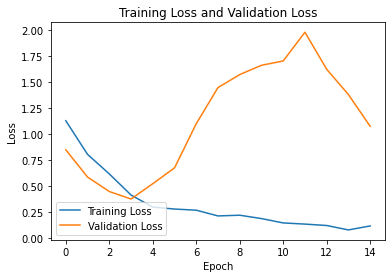

In [ ]:
N = EPOCHS

plt.figure()
plt.plot(np.arange(0, N), HR.history["loss"], label="Training Loss")
plt.plot(np.arange(0, N), HR.history["val_loss"], label="Validation Loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("LossPlotWMF.png")

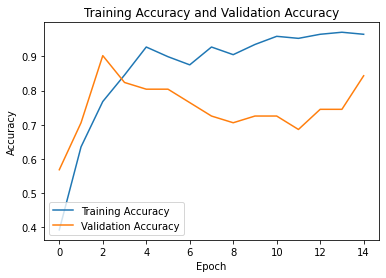

In [ ]:
plt.figure()
plt.plot(np.arange(0, N), HR.history["accuracy"], label="Training Accuracy")
plt.plot(np.arange(0, N), HR.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig("AccuracyPlotWMF.png")